In [1]:
import os

from ipyparallel import Client
from ipyparallel.joblib import IPythonParallelBackend
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"  
os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from keras import backend as K
import ipyparallel as ipp
import os
print('CONFIGURING GPU USAGE USING TENSORFLOW')
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9
config.gpu_options.allow_growth = True 

K.tensorflow_backend.set_session(tf.Session(config=config))
print('GPU INITIALIZED:',config.IsInitialized())
print('GPU CONFIGURATION:',config)
print('CONFIGURING CPU USAGE USING IPY-PARALLEL')
rc = ipp.Client()
ar = rc[:].apply_async(os.getpid)
pid_map = ar.get_dict()



from keras.applications import InceptionResNetV2
import keras   
import numpy as np 
import pandas as pd 
from keras.models import Sequential
from keras import Sequential,activations,metrics
from keras.preprocessing.image import load_img,img_to_array
from keras.layers import Dense, Dropout,MaxPooling2D,GlobalAveragePooling2D,Conv2D,BatchNormalization,Flatten,Activation
import matplotlib.pyplot as plt
import glob 
from keras.regularizers import l1,l2
from keras.optimizers import SGD
from subprocess import check_output
from keras.callbacks import LearningRateScheduler
from keras import optimizers
from keras import backend as k
from keras.models import Model
import ipyparallel as ipp
import cv2
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import glob
from keras.utils import np_utils
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score, confusion_matrix
      
from sklearn.metrics import make_scorer
    
config = tf.ConfigProto(intra_op_parallelism_threads=4,\
        inter_op_parallelism_threads=4, allow_soft_placement=True,\
        device_count = {'CPU' : 3, 'GPU' : 1})
session = tf.Session(config=config)
K.set_session(session)
print(config)


batch_size = 7
train_gen = keras.preprocessing.image.ImageDataGenerator(rotation_range=3,
                                                        width_shift_range=0.0025,
                                                        height_shift_range=0.025,
                                                        brightness_range=None,
                                                        shear_range=0.01,
                                                        zoom_range=0.025,
                                                        channel_shift_range=0.0,
                                                        fill_mode="nearest",
                                                        cval=0.0,
                                                        horizontal_flip=True,
                                                        vertical_flip=True,
                                                        rescale= 1./255,
                                                        preprocessing_function=None,
                                                        data_format=None,
                                                        validation_split=0.25,
                                                        dtype=None,
                                                        )

valid_gen = keras.preprocessing.image.ImageDataGenerator(rotation_range=45,
                                                        width_shift_range=0.005,
                                                        height_shift_range=0.015,
                                                        brightness_range=None,
                                                        shear_range=0.09,
                                                        zoom_range=0.145,
                                                        channel_shift_range=0.0,
                                                        fill_mode="constant",
                                                        cval=0.0,
                                                        horizontal_flip=True,
                                                        vertical_flip=True,
                                                        rescale= 1./255,
                                                        preprocessing_function=None,
                                                        data_format=None,
                                                        validation_split=0.25,
                                                        dtype=None,)

test_gen = keras.preprocessing.image.ImageDataGenerator(samplewise_std_normalization=False,
                                                        rotation_range=90,
                                                        width_shift_range=0.0045,
                                                        height_shift_range=0.015,
                                                        brightness_range=None,
                                                        shear_range=0.02,
                                                        zoom_range=0.2400,
                                                        channel_shift_range=0.0,
                                                        fill_mode="constant",
                                                        cval=0.0,
                                                        horizontal_flip=True,
                                                        vertical_flip=True,
                                                        rescale= 1./255,
                                                        preprocessing_function=None,
                                                        data_format=None,
                                                        validation_split=0.25,
                                                        dtype=None,)

train_generator = train_gen.flow_from_directory('Naira_Model_Dataset/train/train/', shuffle=True, 
        target_size=(255,255),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical')


test_generator = test_gen.flow_from_directory('Naira_Model_Dataset/validation/validation/',shuffle=True,
        target_size=(255,255),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = valid_gen.flow_from_directory('Naira_Model_Dataset/test/test/',shuffle=True,
        target_size=(255,255),
        batch_size=batch_size,
        class_mode='categorical')

from keras.models import load_model
model1 = load_model('Currency_baseline.h5')
model1.summary()

print('Gathering score for Global Average Pooling BASELINE Neural Network')
scores1 = model1.evaluate_generator(test_generator,steps=12//2,workers=-1)
print("%s: %.2f%%" % (model1.metrics_names[1], scores1[1]*100))

print('Gathering predictions for Global Average Pooling BASELINE Neural Network')
pred1=model1.predict_generator(test_generator,verbose=True,workers=-1,steps=600//64)
pd.DataFrame(pred1.data.tolist())
    

C:\Users\peace\Anaconda3_2\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\peace\Anaconda3_2\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\peace\Anaconda3_2\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\peace\Anaconda3_2\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarnin

CONFIGURING GPU USAGE USING TENSORFLOW
GPU INITIALIZED: True
GPU CONFIGURATION: gpu_options {
  per_process_gpu_memory_fraction: 0.9
  allow_growth: true
}

CONFIGURING CPU USAGE USING IPY-PARALLEL
device_count {
  key: "CPU"
  value: 3
}
device_count {
  key: "GPU"
  value: 1
}
intra_op_parallelism_threads: 4
inter_op_parallelism_threads: 4
allow_soft_placement: true

Found 265 images belonging to 8 classes.
Found 264 images belonging to 8 classes.


W0812 16:59:53.420063 10752 deprecation_wrapper.py:119] From C:\Users\peace\Anaconda3_2\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0812 16:59:53.423065 10752 deprecation_wrapper.py:119] From C:\Users\peace\Anaconda3_2\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0812 16:59:53.443063 10752 deprecation_wrapper.py:119] From C:\Users\peace\Anaconda3_2\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0812 16:59:53.498062 10752 deprecation_wrapper.py:119] From C:\Users\peace\Anaconda3_2\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



Found 264 images belonging to 8 classes.


W0812 16:59:53.500063 10752 deprecation_wrapper.py:119] From C:\Users\peace\Anaconda3_2\lib\site-packages\keras\backend\tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W0812 16:59:53.500063 10752 deprecation_wrapper.py:119] From C:\Users\peace\Anaconda3_2\lib\site-packages\keras\backend\tensorflow_backend.py:199: The name tf.is_variable_initialized is deprecated. Please use tf.compat.v1.is_variable_initialized instead.

W0812 16:59:53.564063 10752 deprecation_wrapper.py:119] From C:\Users\peace\Anaconda3_2\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0812 16:59:53.685063 10752 deprecation.py:323] From C:\Users\peace\Anaconda3_2\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instruc

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 252, 252, 2)       98        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 2)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 123, 123, 2)       66        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 2)         0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 24        
Total params: 188
Trainable params: 188
Non-trainable params: 0
_________________________________________________________________
Gathering sc

,0,1,2,3,4,5,6,7
0,0.125768,0.128608,0.122764,0.126477,0.122859,0.125312,0.124696,0.123516
1,0.125634,0.128701,0.122844,0.126579,0.122752,0.125275,0.124682,0.123533
2,0.124350,0.130078,0.124752,0.125664,0.122800,0.125382,0.124263,0.122712
3,0.124324,0.130092,0.124758,0.125702,0.122768,0.125370,0.124262,0.122724
4,0.125140,0.129231,0.123578,0.126225,0.122773,0.125317,0.124521,0.123216
...,...,...,...,...,...,...,...,...
58,0.124622,0.129666,0.124063,0.126337,0.122517,0.125240,0.124423,0.123132
59,0.124943,0.129405,0.123783,0.126230,0.122697,0.125298,0.124478,0.123165
60,0.125279,0.129290,0.123866,0.125488,0.123247,0.125515,0.124442,0.122873
61,0.125963,0.128392,0.122458,0.126647,0.122834,0.125288,0.124763,0.123656


[[0.11652955 0.14173761 0.14613442 0.10580856 0.13164783 0.12926026
  0.11894206 0.10993968]]
[2]
2


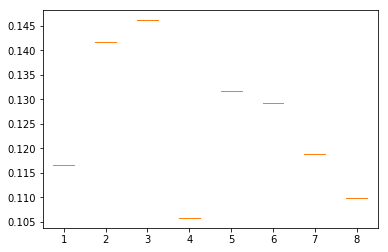

class: 5 naira


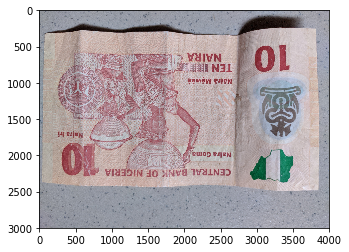

In [2]:
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array,load_img
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
def pred(img_path):    
    img = load_img(img_path,target_size = (255,255)) 
    x = img_to_array(img) 
    x = np.expand_dims(x,axis=0) 
    x = preprocess_input(x)
    c = model1.predict_classes(x)
    m = model1.predict(x) 
    print(m)
    print(c)
    p = np.argmax(model1.predict(x)) 
    print(p)
    acc = np.mean(p == x) *100
    plt.boxplot(m)
    plt.show()
    if p==0:    
        print("class:0- 50 naira")
    if p==1:
        print("class:1- 500 naira")     
    if p==2:
        print("class:2- 5 naira")
    if p==3:    
        print("class:3- 100 naira")
    if p==4:
        print("class:4- 1000 naira")     
    if p==5:
        print("class:5- 10 naira")
    if p==6:    
        print("class:6- 20 naira")
    if p==7:
        print("class:7- 200 naira")     
#     if p==8:
#         print("class: data too random or false")
        
pred("Naira_Model_Dataset/test/test/Ten_naira/IMG_20200727_133813.jpg")
z = plt.imread('Naira_Model_Dataset/test/test/Ten_naira/IMG_20200727_133813.jpg') 
plt.imshow(z)
    

[[0.1198988  0.13543776 0.13289888 0.12031522 0.1241371  0.12620774
  0.12239946 0.11870506]]
[1]
1


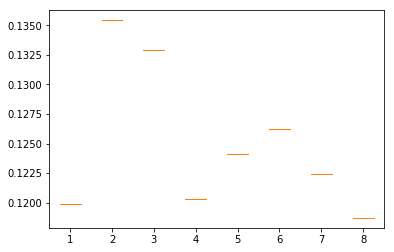

class: 500 naira


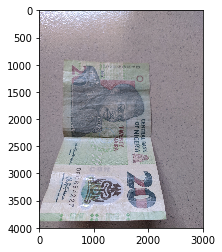

In [3]:
# with parallel_backend('ipyparallel'):
pred("Naira_Model_Dataset/test/test/Twenty_naira/IMG_20200723_135800.jpg")
x = plt.imread('Naira_Model_Dataset/test/test/Twenty_naira/IMG_20200723_135800.jpg') 
plt.imshow(x)

[[0.11437166 0.14280991 0.14552568 0.11069911 0.12747343 0.12774153
  0.11933734 0.11204127]]
[2]
2


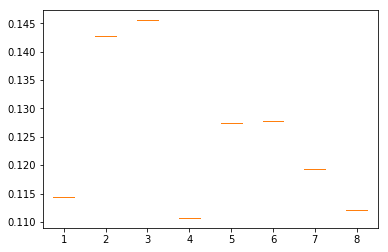

class: 5 naira


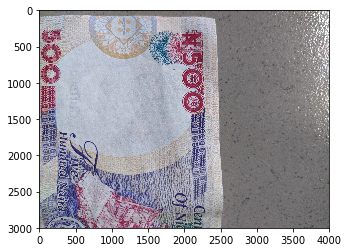

In [4]:
# with parallel_backend('ipyparallel'):
pred("Naira_Model_Dataset/test/test/Five_hundred_naira/IMG_20200723_121450.jpg")
x = plt.imread('Naira_Model_Dataset/test/test/Five_hundred_naira/IMG_20200723_121450.jpg') 
plt.imshow(x)